In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb

In [ ]:
train=pd.read_excel("/content/drive/MyDrive/dataset/Data_Train_flight.xlsx")
test=pd.read_excel("/content/drive/MyDrive/dataset/Test_set_flight.xlsx")

In [ ]:
train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [ ]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_test_data = [train, test]

# **EDA**

In [ ]:
for dataset in train_test_data:
    dataset["Journey_day"] = pd.to_datetime(dataset["Date_of_Journey"], format = "%d/%m/%Y").dt.day
    dataset["Journey_month"] = pd.to_datetime(dataset["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [ ]:
test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [ ]:
train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
for dataset in train_test_data:
  dataset["Departure_hour"]= pd.to_datetime(dataset["Dep_Time"]).dt.hour
  dataset["Departure_minute"]= pd.to_datetime(dataset["Dep_Time"]).dt.minute
  train["Arrival_hour"]= pd.to_datetime(train["Arrival_Time"]).dt.hour
  train["Arrival_minute"]= pd.to_datetime(train["Arrival_Time"]).dt.minute

In [ ]:
train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
  duration= list(train["Duration"])
  for i in range(len(duration)):
        if len(duration[i].split()) !=2:
          if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
          else:
            duration[i] = "0h " + duration[i]
  duration_hours = []
  duration_mins = []

  for i in range(len(duration)):
        duration_hours.append(int(duration[i].split(sep="h")[0]))
        duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [ ]:
# for dataset in train_test_data:
train["Duration_hour"]=duration_hours
train["Duration_minutes"]=duration_mins

In [ ]:
  duration= list(test["Duration"])
  for i in range(len(duration)):
        if len(duration[i].split()) !=2:
          if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
          else:
            duration[i] = "0h " + duration[i]
  duration_hours = []
  duration_mins = []

  for i in range(len(duration)):
        duration_hours.append(int(duration[i].split(sep="h")[0]))
        duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [ ]:
test["Duration_hour"]=duration_hours
test["Duration_minutes"]=duration_mins

In [ ]:
test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Departure_hour,Departure_minute,Duration_hour,Duration_minutes
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,6,20,4,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15,23,45
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,8,0,13,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55,2,50


In [ ]:
for dataset in train_test_data:
    dataset.drop(["Arrival_Time", "Dep_Time","Duration"],axis=1,inplace=True)
# train.head(5)

In [ ]:
train.head(5)


,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [ ]:
train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

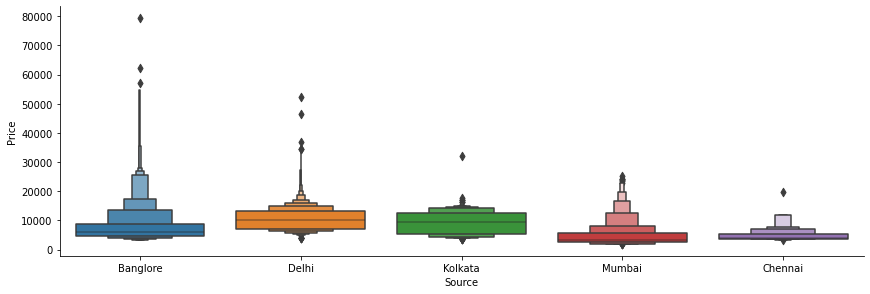

In [ ]:
sb.catplot(y = "Price", x = "Source", data = train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [ ]:
Source= train[["Source"]]
Source= pd.get_dummies(Source, drop_first=True)

In [ ]:
Source.head(5)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

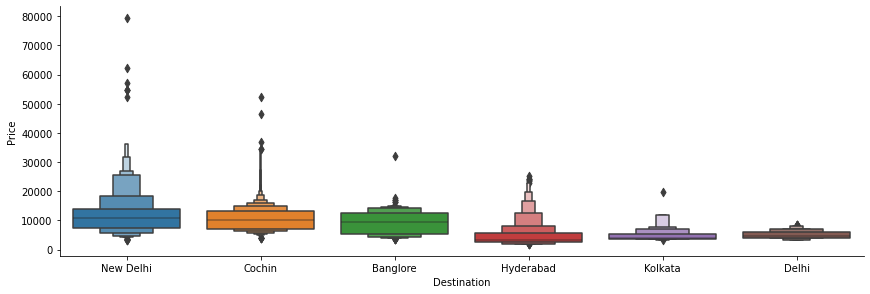

In [ ]:
sb.catplot(y = "Price", x = "Destination", data = train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [ ]:
Destination= train[["Destination"]]
Destination= pd.get_dummies(Destination, drop_first=True)

In [ ]:
train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
Airline= train[["Airline"]]
Airline =pd.get_dummies(Airline, drop_first=True)
Airline.head(5)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
train= pd.concat([train,Airline,Source,Destination],axis=True)

In [ ]:
train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
Source= test[["Source"]]
Source= pd.get_dummies(Source, drop_first=True)

Destination= test[["Destination"]]
Destination= pd.get_dummies(Destination, drop_first=True)

Airline= test[["Airline"]]
Airline =pd.get_dummies(Airline, drop_first=True)

test= pd.concat([test,Airline,Source,Destination],axis=True)

In [ ]:
test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Departure_hour,Departure_minute,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
# for dataset in train_test_data:
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [ ]:
test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Departure_hour,Departure_minute,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,1,No info,6,6,17,30,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,1,No info,12,5,6,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,1,In-flight meal not included,21,5,19,15,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,1,No info,21,5,8,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,0,No info,24,6,23,55,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Departure_hour', 'Departure_minute', 'Arrival_hour',
       'Arrival_minute', 'Duration_hour', 'Duration_minutes',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [ ]:
for dataset in train_test_data:
  dataset.drop(["Airline","Date_of_Journey","Source","Destination","Route","Additional_Info"],axis=1,inplace=True)

In [ ]:
test.head(5)

,Total_Stops,Journey_day,Journey_month,Departure_hour,Departure_minute,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Departure_hour', 'Departure_minute', 'Arrival_hour', 'Arrival_minute',
       'Duration_hour', 'Duration_minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

# **Feature Selection**

In [ ]:
X=train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month',
       'Departure_hour', 'Departure_minute', 'Arrival_hour', 'Arrival_minute',
       'Duration_hour', 'Duration_minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
  # X.head(5)

In [ ]:
X.head(5)

,Total_Stops,Journey_day,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
y=train["Price"]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train, y_train)

0.9533010317868276

In [ ]:
reg_rf.score(X_test, y_test)

0.7972909983516452

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 1177.107406036614


In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [ ]:
model = open('/content/flight_rf.pkl','rb')
forest = pickle.load(model)

In [ ]:
y_prediction = forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test, y_prediction)

0.7972909983516453